# Computer vision project
Jón Víðir Þorvaldsson
Emotion Analysis of Political Party Images


In this project, I explore image data to discern emotions within a collection of political party images. The project focuses on leveraging computer vision techniques to analyse the images in order to shed light on the emotions conveyed and potential patterns across different political parties in Iceland, each with its characteristics and history (Szeliski, 2010, p. 3). This way, I aim to gain valuable insights into the sentiments and characteristics portrayed in these images, and if they reflect and contribute to the characteristics of the parties in general.

Images were gathered from the Meta ad-library and the webpages of each political party. For selecting the four political parties in this assignment, I considered the landscape of Icelandic politics, aiming to capture a spectrum of ideologies and historical contexts. Two of the chosen parties, Sjálfstæðisflokkurinn and Samfylkinging, deeply entrenched in Icelandic political history, bring a legacy of influence and longevity. Complementing these established entities are two newer parties, Píratar and Miðflokkurinn. Furthermore, I sought to balance the selection between conservative and liberal ideologies, ensuring a comprehensive representation of the ideological spectrum prevalent in Icelandic politics. This inclusion enables a nuanced exploration of contrasting viewpoints and policy agendas. Moreover, by incorporating both active governing parties and those in opposition, I aim to capture the multifaceted dynamics of Icelandic politics. This selection allows for an examination of the contrasting roles and responsibilities undertaken by parties in positions of power versus those advocating for change from outside the government. Mirroring the approach of Aparicio, Sequeira, and Costa (2021) in analyzing the emotional content of political parties' communications on Twitter during the pandemic, this project extends the methodology to explore the emotional landscape within Icelandic political imagery.

This exploration of emotional expressions in political imagery aligns with broader academic discussions on the intrinsic link between emotion and rationality in politics. This connection challenges the traditional view of emotions as merely irrational or epiphenomenal, suggesting instead that they are integral to strategic communication and voter persuasion. By analyzing emotional cues in political party images, this project contributes to understanding how emotions, far from being irrational, serve as a sophisticated tool for political actors to engage and influence the electorate, resonating with the nuanced perspectives on emotion's role in political analysis (Mercer, 2006). The strategic use of emotions such as fear has been highlighted in recent academic research. Fear appears to serve as a potent mechanism for political actors to transcend traditional boundaries, enhancing receptivity to new information among voters. This strategy, while effective in broadening a party's appeal to ideologically diverse voter groups, requires careful differentiation from competitors to avoid potential drawbacks (Scheller, 2019).

This project's analysis of emotional expressions within Icelandic political party imagery not only illuminates the strategic deployment of emotions in political communication but also aims to highlight the sophistication behind these tactics as they intersect with voter engagement strategies. By integrating computer vision techniques to decode the emotional landscape of political imagery, projects like this can contribute significantly to our understanding of how political entities leverage emotional expressions to shape public perception and influence electoral dynamics, thereby enriching the discourse on the role of emotion in politics and its impact on democratic engagement.


# Importing necessary libraries for handling files, image processing, data manipulation and visualization.
import os
import zipfile
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
!pip install deepface

# Importing the deepface library for emotion analysis.
from deepface import DeepFace


# Extracting the images from Google Drive into the working directory.

!gdown https://drive.google.com/uc?id=1RQ-xiyG20k2Bb9-nmw48GX1NUNpjnJE2
zip_path = 'Political party images CV.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('.')

In this initial phase the images are pre-processed and standardized. This is crucial since variations in image size can affect the performance of the analysis, potentially leading to incostistencies or biases. This allows for a more unbiased analysis and makes the images ready for machine learning models for emotion recognition.
from PIL import Image
import os

def load_and_resize_images(folder_path, size=(256, 256)):
    images = []
    print(f"Loading images from {folder_path}...")
    image_count = 0  # Counting how many images are processed

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):  # Confirming the file extension matches
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path).resize(size)
                images.append((img, img_path))
                image_count += 1
            except Exception as e:
                print(f"Could not load image {filename}: {e}")
    
    print(f"Loaded and resized {image_count} images.")
    return images

# Looking into the folders for each party and how many images are processed.
# We can see for some reason only 11 out of the 12 images are being processed for this party.

folder_path = "/content/Political party images CV/Sjalfstaedis"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")
# The same process for other parties, all 12 images are being processed.
folder_path = "/content/Political party images CV/Samfylking"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")
folder_path = "/content/Political party images CV/Piratar"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")
folder_path = "/content/Political party images CV/Midflokkur"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")
# Emotion analysis
This segment analyses and aggregates emotion scores from images affiliated with the four political parties using DeepFace. Initially, the process involves setting up a structured directory environment, where images are organized by political parties, allowing for seamless access and batch processing. Crucial to this analysis is the analyze_emotions_in_folder function, which iterates through each party's image repository, applying the DeepFace.analyze method to quantify emotional expressions across predefined categories (such as 'happy', 'sad', 'angry', etc.). This method meticulously computes emotion scores for individual images, facilitating aggregation of these scores to encapsulate the overarching emotional associated with each party's visual portrayal.
parent_folder = "/content/Political party images CV"
folders = ["Sjalfstaedis", "Samfylking", "Midflokkur", "Piratar"]

def analyze_emotions_in_folder(folder_name, folder_path):
    emotion_scores = {emotion: [] for emotion in ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']}
    
    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]
    
    for img_path in image_paths:
        try:
            analysis = DeepFace.analyze(img_path=img_path, actions=['emotion'])
            if isinstance(analysis, list):
                analysis = analysis[0]
            
            # Aggregate scores for each emotion
            for emotion, score in analysis['emotion'].items():
                emotion_scores[emotion].append(score)
                
        except Exception as e:
            print(f"Error analyzing {img_path}: {e}")

    return emotion_scores

# Dictionary to hold aggregated emotion scores for each party
emotion_aggregates = {folder: {} for folder in folders}

for folder in folders:
    print(f"\nAnalyzing images in folder: {folder}")
    folder_path = os.path.join(parent_folder, folder)
    emotion_aggregates[folder] = analyze_emotions_in_folder(folder, folder_path)

# Calculate and print average emotion scores for each political party
for party, scores in emotion_aggregates.items():
    print(f"\nAverage emotion scores for {party}:")
    for emotion, score_list in scores.items():
        if score_list:
            average_score = np.mean(score_list)
            print(f"{emotion.capitalize()}: {average_score:.2f}")
        else:
            print(f"{emotion.capitalize()}: No data")
As we can see, the results differ between the parties, and errors came up for four images in total, two from Samfylking and two from Píratar. To get a clearer view of the differences between the parties, I take a quick look at the top 3 emotions for each party.
import pandas as pd

# Using the results from the emotion analysis
data = {
    'Party': ['Sjalfstaedis', 'Samfylking', 'Midflokkur', 'Piratar'],
    'Angry': [6.26, 11.09, 5.78, 2.02],
    'Disgust': [0.01, 0.00, 0.00, 0.02],
    'Fear': [14.57, 9.84, 1.19, 7.00],
    'Happy': [29.46, 35.55, 45.77, 68.27],
    'Sad': [23.87, 5.49, 12.26, 4.37],
    'Surprise': [1.77, 0.02, 0.00, 0.07],
    'Neutral': [24.07, 38.02, 35.00, 18.25]
}
df = pd.DataFrame(data)

# Adjusted function to get top 3 emotions for each party
def get_top_3_emotions(row):
    row_data = row[1:] if 'Party' in row.index else row
    sorted_emotions = row_data.sort_values(ascending=False)
    # Getting the top 3 emotions and their scores
    top_3_emotions = sorted_emotions.head(3).index.tolist()
    return pd.Series(top_3_emotions)

top_3_emotions_df = df.apply(get_top_3_emotions, axis=1)
top_3_emotions_df.columns = ['1st Emotion', '2nd Emotion', '3rd Emotion']

result_df = pd.concat([df[['Party']], top_3_emotions_df], axis=1)

print(result_df)

Happiness and neutrality are the most expressed emotions by the four parties, happiness is the top emotion for all except Samfylkingin, where neutrality has the highest score and happiness is in close second place. In third place we have sadness for Sjálfstæðisflokkur and Miðflokkur, but for Samfylking it is anger and Píratar fear. To look even further into these differences and enable for a clearer comparison between the four parties, I visualize the distribution of emotional composition for each party. Since four images could not be analysed, two from Samfylking and two from Píratar, and the algorythm seems to have missed one image from Sjálfstæðis, I normalize the scores into proportions to emphasize the relative importance of each emotion, rather than to see the absolute values.
import matplotlib.pyplot as plt

data = {
    'Party': ['Sjalfstaedis', 'Samfylking', 'Midflokkur', 'Piratar'],
    'Angry': [6.26, 11.09, 5.78, 2.02],
    'Disgust': [0.01, 0.00, 0.00, 0.02],
    'Fear': [14.57, 9.84, 1.19, 7.00],
    'Happy': [29.46, 35.55, 45.77, 68.27],
    'Sad': [23.87, 5.49, 12.26, 4.37],
    'Surprise': [1.77, 0.02, 0.00, 0.07],
    'Neutral': [24.07, 38.02, 35.00, 18.25]
}

df = pd.DataFrame(data)

# Normalizing the scores to get proportions
emotion_columns = df.columns[1:]  
df[emotion_columns] = df[emotion_columns].div(df[emotion_columns].sum(axis=1), axis=0)

color_map = {
    "Angry": "red",
    "Disgust": "limegreen",
    "Fear": "purple",
    "Happy": "gold",
    "Sad": "blue",
    "Surprise": "orange",
    "Neutral": "grey"
}

ax = df.set_index("Party")[emotion_columns].plot(kind="bar", stacked=True, figsize=(10, 7), color=[color_map[col] for col in emotion_columns], edgecolor='black')

plt.title("Proportional Distribution of Emotions by Political Party")
plt.xlabel("Political Party")
plt.ylabel("Proportion")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

As seen on the barchart, Sjálfstæðisflokkurinn shows a relatively balanced emotional composition with notable proportions of Fear, Sad and Neutral, alonside a significant presence of happy, which takes up the largest proportion of their emotions portrayed. The emotional profile of Samfylkingin is predominantly positive and calm, dominated by Happy and Neutral emotions. Even though they have the highest proportion of Angry out of the four parties, it still takes up a relatively small proportion of their profile overall. Miðflokkurinn is charectarized by a high proportion of Happy, followed by Neutral, so their overall imegary is rather positive, sadness takes up the third biggest proportion of their profile but is still relatively small. Píratar stand out with an overwhelming dominance of Happy, dwarfing all other emotions significantly. The minimal proportion of Angry, Fear and Sad alongside a lower Neutral score compared to others, suggest an exceptionally positive emotional strategy, possibly aiming to inspire their audience. The barchart is still missing some key emotions found in the overall analysis, so I plot this even further with an interactive radar chart.
!pip install plotly
import plotly.graph_objects as go
import pandas as pd

data = {
    'Party': ['Sjalfstaedis', 'Samfylking', 'Midflokkur', 'Piratar'],
    'Angry': [6.26, 11.09, 5.78, 2.02],
    'Disgust': [0.01, 0.00, 0.00, 0.02],
    'Fear': [14.57, 9.84, 1.19, 7.00],
    'Happy': [29.46, 35.55, 45.77, 68.27],
    'Sad': [23.87, 5.49, 12.26, 4.37],
    'Surprise': [1.77, 0.02, 0.00, 0.07],
    'Neutral': [24.07, 38.02, 35.00, 18.25]
}
df = pd.DataFrame(data)

emotion_columns = df.columns[1:]  # Exclude "Party"
df[emotion_columns] = df[emotion_columns].div(df[emotion_columns].sum(axis=1), axis=0)

fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[emotion_columns].values,
        theta=emotion_columns,
        fill='toself',
        name=row["Party"]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="Proportional Distribution of Emotions by Political Party",
    showlegend=True
)

fig.show()

The radar chart highlights the balance of emotions within each party's profile. For instance, the broader spread of Sjálfstæðisflokkurinn across emotions like Fear, Sad, and Neutral — with relatively high values — suggests a more balanced emotional appeal compared to others. The proximity between Happy and Neutral for Samfylkingin and Miðflokkurinn, for instance, suggests these parties aim to blend positivity with a sense of calm or neutrality. This might indicate a strategic positioning to appeal as both optimistic and reliable. In contrast, the sharp contrast between Happy and other emotions in Píratar's profile underscores a more singular focus on projecting positivity. Ultimately, the radar chart offers a clear "emotional signature" for each party, a holistic view that encapsulates the party's emotional branding. This signature provides insights into how each party might be leveraging emotional content to forge a distinct identity within the political landscape, aiming to resonate with specific voter segments or societal values.

Emotion Analysis of Political Party Images



In this project, I explore image data to discern emotions within a collection of political party images. The project focuses on leveraging computer vision techniques to analyse the images in order to shed light on the emotions conveyed and potential patterns across different political parties in Iceland, each with its characteristics and history (Szeliski, 2010, p. 3). This way, I aim to gain valuable insights into the sentiments and characteristics portrayed in these images, and if they reflect and contribute to the characteristics of the parties in general.

Images were gathered from the Meta ad-library and the webpages of each political party. For selecting the four political parties in this assignment, I considered the landscape of Icelandic politics, aiming to capture a spectrum of ideologies and historical contexts. Two of the chosen parties, Sjálfstæðisflokkurinn and Samfylkinging, deeply entrenched in Icelandic political history, bring a legacy of influence and longevity. Complementing these established entities are two newer parties, Píratar and Miðflokkurinn. Furthermore, I sought to balance the selection between conservative and liberal ideologies, ensuring a comprehensive representation of the ideological spectrum prevalent in Icelandic politics. This inclusion enables a nuanced exploration of contrasting viewpoints and policy agendas. Moreover, by incorporating both active governing parties and those in opposition, I aim to capture the multifaceted dynamics of Icelandic politics. This selection allows for an examination of the contrasting roles and responsibilities undertaken by parties in positions of power versus those advocating for change from outside the government. Mirroring the approach of Aparicio, Sequeira, and Costa (2021) in analyzing the emotional content of political parties' communications on Twitter during the pandemic, this project extends the methodology to explore the emotional landscape within Icelandic political imagery.

This exploration of emotional expressions in political imagery aligns with broader academic discussions on the intrinsic link between emotion and rationality in politics. This connection challenges the traditional view of emotions as merely irrational or epiphenomenal, suggesting instead that they are integral to strategic communication and voter persuasion. By analyzing emotional cues in political party images, this project contributes to understanding how emotions, far from being irrational, serve as a sophisticated tool for political actors to engage and influence the electorate, resonating with the nuanced perspectives on emotion's role in political analysis (Mercer, 2006). The strategic use of emotions such as fear has been highlighted in recent academic research. Fear appears to serve as a potent mechanism for political actors to transcend traditional boundaries, enhancing receptivity to new information among voters. This strategy, while effective in broadening a party's appeal to ideologically diverse voter groups, requires careful differentiation from competitors to avoid potential drawbacks (Scheller, 2019).

This project's analysis of emotional expressions within Icelandic political party imagery not only illuminates the strategic deployment of emotions in political communication but also aims to highlight the sophistication behind these tactics as they intersect with voter engagement strategies. By integrating computer vision techniques to decode the emotional landscape of political imagery, projects like this can contribute significantly to our understanding of how political entities leverage emotional expressions to shape public perception and influence electoral dynamics, thereby enriching the discourse on the role of emotion in politics and its impact on democratic engagement.



In [ ]:
# Importing necessary libraries for handling files, image processing, data manipulation and visualization.
import os
import zipfile
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
!pip install deepface

# Importing the deepface library for emotion analysis.
from deepface import DeepFace


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.0 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=c3d83e7a120dd1aad5c950a8d579cc8e0bbbae40abcacb414094318523d40cd4
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire
24-12-09 20:59:51 - Directory /root/.deepface has been created
24-12-09 20:59:51 - Directory /root/.deepface/weights has been created


In [ ]:
# Extracting the images from Google Drive into the working directory.

!gdown https://drive.google.com/uc?id=1RQ-xiyG20k2Bb9-nmw48GX1NUNpjnJE2
zip_path = 'Political party images CV.zip'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('.')


Downloading...
From: https://drive.google.com/uc?id=1RQ-xiyG20k2Bb9-nmw48GX1NUNpjnJE2
To: /content/Political party images CV.zip
100% 12.9M/12.9M [00:00<00:00, 206MB/s]


In this initial phase the images are pre-processed and standardized. This is crucial since variations in image size can affect the performance of the analysis, potentially leading to incostistencies or biases. This allows for a more unbiased analysis and makes the images ready for machine learning models for emotion recognition.

In [ ]:
from PIL import Image
import os

def load_and_resize_images(folder_path, size=(256, 256)):
    images = []
    print(f"Loading images from {folder_path}...")
    image_count = 0  # Counting how many images are processed

    for filename in os.listdir(folder_path):
        if filename.endswith('.jpeg'):  # Confirming the file extension matches
            img_path = os.path.join(folder_path, filename)
            try:
                img = Image.open(img_path).resize(size)
                images.append((img, img_path))
                image_count += 1
            except Exception as e:
                print(f"Could not load image {filename}: {e}")

    print(f"Loaded and resized {image_count} images.")
    return images


In [ ]:
# Looking into the folders for each party and how many images are processed.
# We can see for some reason only 11 out of the 12 images are being processed for this party.

folder_path = "/content/Political party images CV/Sjalfstaedis"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")

Loading images from /content/Political party images CV/Sjalfstaedis...
Loaded and resized 11 images.
Total images loaded: 11


In [ ]:
# The same process for other parties, all 12 images are being processed.
folder_path = "/content/Political party images CV/Samfylking"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")

Loading images from /content/Political party images CV/Samfylking...
Loaded and resized 12 images.
Total images loaded: 12


In [ ]:
folder_path = "/content/Political party images CV/Piratar"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")

Loading images from /content/Political party images CV/Piratar...
Loaded and resized 12 images.
Total images loaded: 12


In [ ]:
folder_path = "/content/Political party images CV/Midflokkur"
loaded_images = load_and_resize_images(folder_path)
print(f"Total images loaded: {len(loaded_images)}")

Loading images from /content/Political party images CV/Midflokkur...
Loaded and resized 12 images.
Total images loaded: 12


# Emotion analysis

This segment analyses and aggregates emotion scores from images affiliated with the four political parties using DeepFace. Initially, the process involves setting up a structured directory environment, where images are organized by political parties, allowing for seamless access and batch processing. Crucial to this analysis is the analyze_emotions_in_folder function, which iterates through each party's image repository, applying the DeepFace.analyze method to quantify emotional expressions across predefined categories (such as 'happy', 'sad', 'angry', etc.). This method meticulously computes emotion scores for individual images, facilitating aggregation of these scores to encapsulate the overarching emotional associated with each party's visual portrayal.

In [ ]:
parent_folder = "/content/Political party images CV"
folders = ["Sjalfstaedis", "Samfylking", "Midflokkur", "Piratar"]

def analyze_emotions_in_folder(folder_name, folder_path):
    emotion_scores = {emotion: [] for emotion in ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']}

    image_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]

    for img_path in image_paths:
        try:
            analysis = DeepFace.analyze(img_path=img_path, actions=['emotion'])
            if isinstance(analysis, list):
                analysis = analysis[0]

            # Aggregate scores for each emotion
            for emotion, score in analysis['emotion'].items():
                emotion_scores[emotion].append(score)

        except Exception as e:
            print(f"Error analyzing {img_path}: {e}")

    return emotion_scores

# Dictionary to hold aggregated emotion scores for each party
emotion_aggregates = {folder: {} for folder in folders}

for folder in folders:
    print(f"\nAnalyzing images in folder: {folder}")
    folder_path = os.path.join(parent_folder, folder)
    emotion_aggregates[folder] = analyze_emotions_in_folder(folder, folder_path)

# Calculate and print average emotion scores for each political party
for party, scores in emotion_aggregates.items():
    print(f"\nAverage emotion scores for {party}:")
    for emotion, score_list in scores.items():
        if score_list:
            average_score = np.mean(score_list)
            print(f"{emotion.capitalize()}: {average_score:.2f}")
        else:
            print(f"{emotion.capitalize()}: No data")


Analyzing images in folder: Sjalfstaedis
24-12-09 21:00:06 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 44.2MB/s]



Analyzing images in folder: Samfylking
Error analyzing /content/Political party images CV/Samfylking/samfylking11.jpeg: Face could not be detected in /content/Political party images CV/Samfylking/samfylking11.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error analyzing /content/Political party images CV/Samfylking/samfylkingin2.jpeg: Face could not be detected in /content/Political party images CV/Samfylking/samfylkingin2.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

Analyzing images in folder: Midflokkur

Analyzing images in folder: Piratar
Error analyzing /content/Political party images CV/Piratar/piratar10.jpeg: Face could not be detected in /content/Political party images CV/Piratar/piratar10.jpeg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.
Error analyzing /content/Political party images CV/Piratar/pirata

As we can see, the results differ between the parties, and errors came up for four images in total, two from Samfylking and two from Píratar. To get a clearer view of the differences between the parties, I take a quick look at the top 3 emotions for each party.

In [ ]:
import pandas as pd

# Using the results from the emotion analysis
data = {
    'Party': ['Sjalfstaedis', 'Samfylking', 'Midflokkur', 'Piratar'],
    'Angry': [6.26, 11.09, 5.78, 2.02],
    'Disgust': [0.01, 0.00, 0.00, 0.02],
    'Fear': [14.57, 9.84, 1.19, 7.00],
    'Happy': [29.46, 35.55, 45.77, 68.27],
    'Sad': [23.87, 5.49, 12.26, 4.37],
    'Surprise': [1.77, 0.02, 0.00, 0.07],
    'Neutral': [24.07, 38.02, 35.00, 18.25]
}
df = pd.DataFrame(data)

# Adjusted function to get top 3 emotions for each party
def get_top_3_emotions(row):
    row_data = row[1:] if 'Party' in row.index else row
    sorted_emotions = row_data.sort_values(ascending=False)
    # Getting the top 3 emotions and their scores
    top_3_emotions = sorted_emotions.head(3).index.tolist()
    return pd.Series(top_3_emotions)

top_3_emotions_df = df.apply(get_top_3_emotions, axis=1)
top_3_emotions_df.columns = ['1st Emotion', '2nd Emotion', '3rd Emotion']

result_df = pd.concat([df[['Party']], top_3_emotions_df], axis=1)

print(result_df)


          Party 1st Emotion 2nd Emotion 3rd Emotion
0  Sjalfstaedis       Happy     Neutral         Sad
1    Samfylking     Neutral       Happy       Angry
2    Midflokkur       Happy     Neutral         Sad
3       Piratar       Happy     Neutral        Fear


Happiness and neutrality are the most expressed emotions by the four parties, happiness is the top emotion for all except Samfylkingin, where neutrality has the highest score and happiness is in close second place. In third place we have sadness for Sjálfstæðisflokkur and Miðflokkur, but for Samfylking it is anger and Píratar fear. To look even further into these differences and enable for a clearer comparison between the four parties, I visualize the distribution of emotional composition for each party. Since four images could not be analysed, two from Samfylking and two from Píratar, and the algorythm seems to have missed one image from Sjálfstæðis, I normalize the scores into proportions to emphasize the relative importance of each emotion, rather than to see the absolute values.

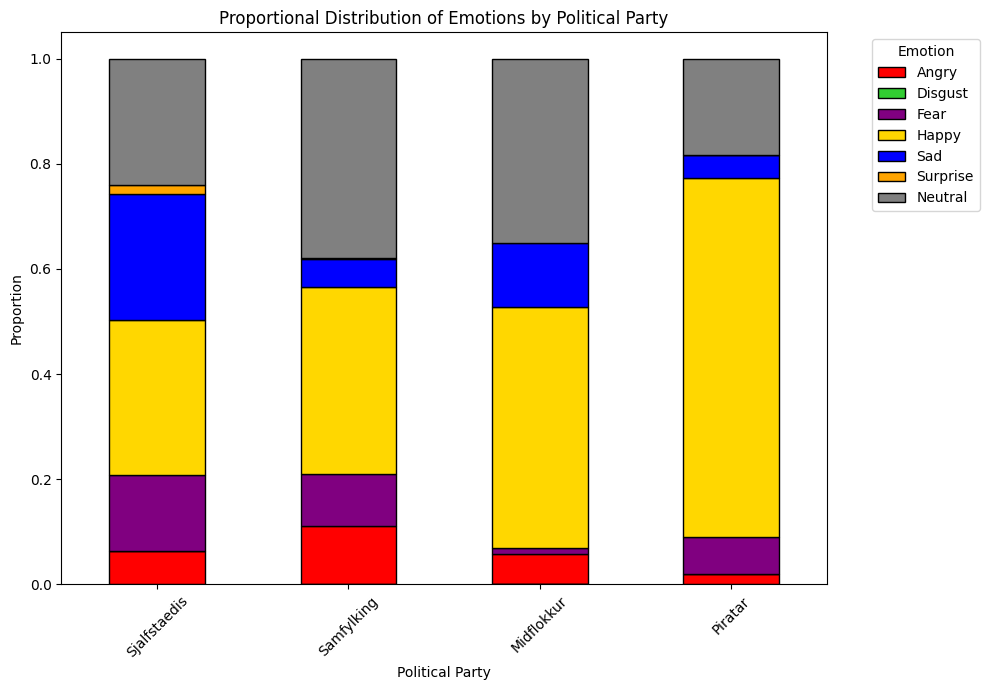

In [ ]:
import matplotlib.pyplot as plt

data = {
    'Party': ['Sjalfstaedis', 'Samfylking', 'Midflokkur', 'Piratar'],
    'Angry': [6.26, 11.09, 5.78, 2.02],
    'Disgust': [0.01, 0.00, 0.00, 0.02],
    'Fear': [14.57, 9.84, 1.19, 7.00],
    'Happy': [29.46, 35.55, 45.77, 68.27],
    'Sad': [23.87, 5.49, 12.26, 4.37],
    'Surprise': [1.77, 0.02, 0.00, 0.07],
    'Neutral': [24.07, 38.02, 35.00, 18.25]
}

df = pd.DataFrame(data)

# Normalizing the scores to get proportions
emotion_columns = df.columns[1:]
df[emotion_columns] = df[emotion_columns].div(df[emotion_columns].sum(axis=1), axis=0)

color_map = {
    "Angry": "red",
    "Disgust": "limegreen",
    "Fear": "purple",
    "Happy": "gold",
    "Sad": "blue",
    "Surprise": "orange",
    "Neutral": "grey"
}

ax = df.set_index("Party")[emotion_columns].plot(kind="bar", stacked=True, figsize=(10, 7), color=[color_map[col] for col in emotion_columns], edgecolor='black')

plt.title("Proportional Distribution of Emotions by Political Party")
plt.xlabel("Political Party")
plt.ylabel("Proportion")
plt.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


As seen on the barchart, Sjálfstæðisflokkurinn shows a relatively balanced emotional composition with notable proportions of Fear, Sad and Neutral, alonside a significant presence of happy, which takes up the largest proportion of their emotions portrayed. The emotional profile of Samfylkingin is predominantly positive and calm, dominated by Happy and Neutral emotions. Even though they have the highest proportion of Angry out of the four parties, it still takes up a relatively small proportion of their profile overall. Miðflokkurinn is charectarized by a high proportion of Happy, followed by Neutral, so their overall imegary is rather positive, sadness takes up the third biggest proportion of their profile but is still relatively small. Píratar stand out with an overwhelming dominance of Happy, dwarfing all other emotions significantly. The minimal proportion of Angry, Fear and Sad alongside a lower Neutral score compared to others, suggest an exceptionally positive emotional strategy, possibly aiming to inspire their audience. The barchart is still missing some key emotions found in the overall analysis, so I plot this even further with an interactive radar chart.

In [ ]:
!pip install plotly
import plotly.graph_objects as go
import pandas as pd

data = {
    'Party': ['Sjalfstaedis', 'Samfylking', 'Midflokkur', 'Piratar'],
    'Angry': [6.26, 11.09, 5.78, 2.02],
    'Disgust': [0.01, 0.00, 0.00, 0.02],
    'Fear': [14.57, 9.84, 1.19, 7.00],
    'Happy': [29.46, 35.55, 45.77, 68.27],
    'Sad': [23.87, 5.49, 12.26, 4.37],
    'Surprise': [1.77, 0.02, 0.00, 0.07],
    'Neutral': [24.07, 38.02, 35.00, 18.25]
}
df = pd.DataFrame(data)

emotion_columns = df.columns[1:]  # Exclude "Party"
df[emotion_columns] = df[emotion_columns].div(df[emotion_columns].sum(axis=1), axis=0)

fig = go.Figure()

for index, row in df.iterrows():
    fig.add_trace(go.Scatterpolar(
        r=row[emotion_columns].values,
        theta=emotion_columns,
        fill='toself',
        name=row["Party"]
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )),
    title="Proportional Distribution of Emotions by Political Party",
    showlegend=True
)

fig.show()


The radar chart highlights the balance of emotions within each party's profile. For instance, the broader spread of Sjálfstæðisflokkurinn across emotions like Fear, Sad, and Neutral — with relatively high values — suggests a more balanced emotional appeal compared to others. The proximity between Happy and Neutral for Samfylkingin and Miðflokkurinn, for instance, suggests these parties aim to blend positivity with a sense of calm or neutrality. This might indicate a strategic positioning to appeal as both optimistic and reliable. In contrast, the sharp contrast between Happy and other emotions in Píratar's profile underscores a more singular focus on projecting positivity. Ultimately, the radar chart offers a clear "emotional signature" for each party, a holistic view that encapsulates the party's emotional branding. This signature provides insights into how each party might be leveraging emotional content to forge a distinct identity within the political landscape, aiming to resonate with specific voter segments or societal values.

# Results and Discussions


The findings from this project provide insights into the landscape of emotional expressions within the imagery associated with Icelandic political parties. Utilizing computer vision techniques, the analysis delineated a predominant tilt towards positive emotional displays across the board, with 'Happy' notably dominating the profiles of certain parties, particularly 'Piratar'. The analysis brought to light the distinctive emotional signatures of each party, from the balanced emotional spectrum of Sjálfstæðisflokkurinn, characterized by a mix of Fear, Sad, and Neutral, to Miðflokkur's emphasis on Happy and Neutral, painting a picture of a diverse political landscape. Active parties, encompassing both conservative Sjálfstæðisflokkurinn and liberal Samfylkingin, tend to showcase a broader emotional range in their imagery, perhaps reflecting the complexities and responsibilities of governance. This range includes both positive and more contemplative emotions, suggesting a nuanced approach to addressing and representing diverse societal issues.

Opposition parties, represented by conservative Miðflokkurinn and liberal Píratar, lean heavily towards positive emotions, particularly Happy, in their visual communications. This pronounced positivity might be a strategic choice to project hope and optimism, setting themselves apart as appealing alternatives to the current political establishment.

Furthermore, the distinction between liberal and conservative parties is subtly underscored in their emotional expression. Liberal parties, Samfylkingin and Píratar, emphasize positivity, potentially aiming to resonate with progressive values and aspirations for change. Conservative parties, while also incorporating positive emotions, display a more varied emotional palette, possibly reflecting traditional values and a broader consideration of societal concerns.This diversity not only underscores the strategic use of imagery to convey specific narratives and values but also opens up avenues for deeper inquiry into the relationship between emotional expression and political identity.

These results align closely with existing literature
However, the project's approach is not without its limitations. The reliance on machine learning models for emotion analysis, while innovative, introduces potential biases inherent in these models, possibly skewing the interpretation of emotional expressions. Additionally, the decision to analyze imagery from a select number of parties limits the generalizability of the findings, suggesting the need for a broader investigation that includes a wider array of political entities to capture the full spectrum of emotional strategies employed in Icelandic politics. In future research in could prove more insightful to analyze all parties, and compare images from their ads for the same particular campaign, like the upcoming local government elections later this year.


# References



J. T. Aparicio, J. Salema de Sequeira and C. J. Costa, "Emotion analysis of Portuguese Political Parties Communication over the covid-19 Pandemic," 2021 16th Iberian Conference on Information Systems and Technologies (CISTI), Chaves, Portugal, 2021, pp. 1-6, doi: 10.23919/CISTI52073.2021.9476557.

Mercer, J. Human nature and the first image: emotion in international politics. J Int Relat Dev 9, 288–303 (2006). https://doi.org/10.1057/palgrave.jird.1800091


Simon Scheller (2019) The Strategic Use of Fear Appeals in Political Communication, Political Communication, 36:4, 586-608, DOI: 10.1080/10584609.2019.1631918

Szeliski, R. (2010) Computer Vision. 2nd edn. Cham: Springer.